### Examining Purity

By default, the metric in the `DecisionTreeClassifier` is the Gini Criterion.  This assigment introduces its use through a basic example.  Your goal is to minimize the impurity based on a range of split options.  In the following assignment you will explore the alternative notion of `entropy` that can also be used as a criterion.  


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

### Gini Impurity

The Gini Criterion is used to identify the optimal place to make a decision for classification based on the purity of the results.  This is measured by a weighted sum of the node size and gini impurity of each split node defined as:

$$\sum_{k}p_{mk}(1 - p_{mk})$$

where 

$$p_{mk} = \frac{1}{N_m} \sum_{y \in Q_m} I(y = k)$$

and $Q_m$ is the data at node $m$ with $N_m$ samples.  [source](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)

### The Data

Below, a small sample from the built in `titanic` dataset is loaded and displayed.  The classification problem is to predict survival on the ship.  You will use the `age` (age of passenger) and `pclass` (passenger class) features to explore the gini splitting criterion.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

In [3]:
titanic = sns.load_dataset('titanic')[['age', 'pclass', 'survived']].head()


In [4]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


The **GINI IMPURITY** of the original data is:

$$ 1 - (\frac{3}{5})^2 - (\frac{2}{5})^2$$

In [5]:
1 - (3/5)**2 - (2/5)**2

0.48

### Problem 1

#### Split on Passenger Class

To begin, consider the information in the data based on splitting the `pclass` column.  Compute the Gini Impurity of the left and right side of the split as `gini_pclass1` and `gini_pclass3` below.  Remember that to compute the gini impurity means:

$$1 - P(\text{survived})^2 - P(\text{neither survived})^2$$

In [6]:
gini_pclass1 = 1 - 1 - 0
gini_pclass3 = 1 - (1/3)**2 - (2/3)**2

In [7]:
print(f'Left node: {gini_pclass1: .2f}\nRight Node: {gini_pclass3: .2f}')

Left node:  0.00
Right Node:  0.44


### Problem 2

#### Computing the Gini Impurity for Passenger Class

Now, to compute the Gini Impurity of the split we find a weighted average of the gini impurities for each leaf node.  These represent the proportion of data in each node times the gini impurity.  

$$\text{Gini Impurity} = \text{Proporition in pclass1}\times\text{gini_pclass1} + \text{Proporition in pclass3}\times\text{gini_pclass3} $$

In [8]:
gini_pclass1 = 1 - 1 - 0
gini_pclass3 = 1 - (1/3)**2 - (2/3)**2
gini_imp_pclass = 2/5*gini_pclass1 + 3/5*gini_pclass3

In [9]:
print(gini_imp_pclass)

0.26666666666666666


### Problem 3

#### Splitting on `age` < 23

Compute the gini impurity for each node below and determine the gini impurity of the split by the comparison `age < 23`.  Assign your answers as `under_23_gini`, `over_23_gini`, and `gini_imp_age` below.

In [10]:
under_23_gini = 1 - 0**2 - 1**2
over_23_gini = 1 - (3/4)**2 - (1/4)**2
gini_imp_age = 1/5*under_23_gini + 4/5*over_23_gini

In [11]:
print(gini_imp_age)

0.30000000000000004


### Problem 4

#### Minimizing Impurity

Compare your impurities and determine which decision rule has a lower impurtiy.  Assign your answer to `min_impurity` as `pclass` or `age_23` below.

In [12]:
min_impurity = 'pclass'

### Problem 5

#### Comparing to `DecisionTreeClassifier`

To identify the *best* split, we would have to consider the other possible age splits.  We will let the `DecisionTreeClassifier` determine this below.  Plot the results of a decision tree of depth 1 below and note the ideal splitting criteria value. Plot the tree and assign to `dtree_graph` below, note the best split.  Does this line up with your earlier computations?

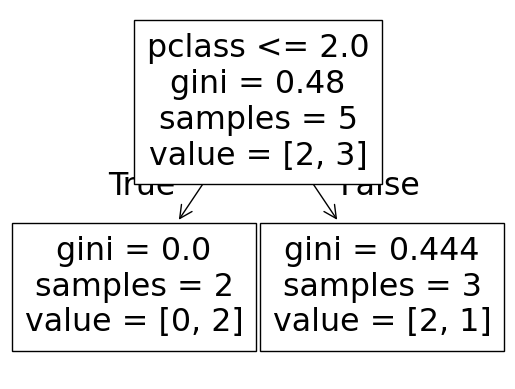

In [13]:
dtree = DecisionTreeClassifier(max_depth = 1).fit(titanic.drop('survived', axis = 1), titanic.survived)
dtree_graph = plot_tree(dtree, feature_names=titanic.drop('survived', axis = 1).columns)

### Codio Activity 14.4:  Using Entropy

This activity focuses on using *entropy* to split nodes in a Decision Tree.  First, you will compute entropy by hand on a small example dataset.  Next, you will use the `DecisionTreeClassifier` to split based on an entropy criteria. 


$$\displaystyle H=-\sum _{i}p_{i}\log p_{i}$$

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

### Sample Data

Below, the same small titanic dataset is created for your with five rows, and assigned as `titanic` below.

In [15]:
titanic = sns.load_dataset('titanic')[['age', 'pclass', 'survived']].head()

In [16]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [17]:
X, y = titanic.drop('survived', axis = 1), titanic.survived

### Problem 1

#### Computing the Entropy

To begin, the entropy of the data is determined by computing the probability for each class and plugging it into the `entropy` formula.  Use the data in `df` to compute the entropy for all the data and assign it as a float to `all_entropy` below. 

**NOTE**:  use `np.log2` to compute the logarithm. 

In [18]:
all_entropy = - 0.4* np.log2(0.4) - 0.6* np.log2(0.6)
all_entropy

np.float64(0.9709505944546686)

### Problem 2

#### Splitting Data

Now, consider splitting the data where `pclass = 1`.   

Compute the entropy for each dataframe as `ent_pclass1` where `pclass < 2` is `True` and `ent_pclass3` respectively.  

In [19]:
ent_pclass1 = -1*np.log2(1)
ent_pclass3 = -(2/3*np.log2(2/3) + 1/3*np.log2(1/3))

In [20]:
print(f'Left node: {ent_pclass1: .2f}\nRight Node: {ent_pclass3: .2f}')

Left node: -0.00
Right Node:  0.92


### Problem 3

#### Weighting the Entropy

Because the split doesn't produce equal sized groups, we want to weight the entropy based on the size of the data in the node.  Use the proportion of data in the respective nodes to compute the total entropy by summing the weighted entropy values below. Assign as a float to `pclass_entropy` below. 

In [21]:
ent_pclass1 = -1*np.log2(1)
ent_pclass3 = -(2/3*np.log2(2/3) + 1/3*np.log2(1/3))
pclass_entropy = (2/5) * ent_pclass1 + (3/5) * ent_pclass3

In [22]:
print(f'Entropy for passenger class: {pclass_entropy: .2f}')

Entropy for passenger class:  0.55


### Problem 4

#### Entropy based on `age < 23`

Compute the weighted sum of the entropy based on splitting based on `age < 23`.  Assign this to `entropy_age` below.  

In [23]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [24]:
ent_age1 = 0
ent_age2 = -(1/4*np.log2(1/4) + 3/4*np.log2(3/4))
entropy_age = 4/5*ent_age2 + 1/5*ent_age1

In [25]:
print(entropy_age)

0.6490224995673063


### Problem 5

#### Minimizing Entropy

Use the `DecisionTreeClassifier` to fit the data with `max_depth = 1` and `criterion = 'entropy'`.  What does the estimator identify as the optimal splitting criterion? Assign the plot of the tree including the feature names and nodes filled to `entropy_tree` below.  

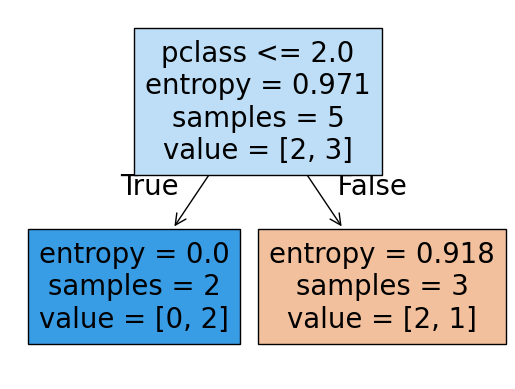

In [26]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 1).fit(X, y)
entropy_tree = plot_tree(dtree, feature_names=X.columns, filled = True)

In [27]:
entropy_tree

[Text(0.5, 0.75, 'pclass <= 2.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.5, '  False')]